# Constructing a 2x2x6 state for low energy searching.
We can start from a single state that is maximally flippable to construct all others. Such a maximally flippable state can be constructed from smaller systems by stacking them on top of each other.

In [1]:
import sys

sys.path.append('../symmetry_stuff/')
from lattice_object import LatticeObject

We start by drawing a maximally flippable 2x2x4 state in a 2x2x6 lattice.

Setting up lattice 64030919769180
# of flippable plaquettes: 29


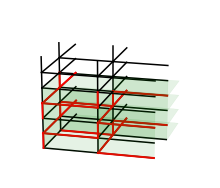

In [2]:
state = 64030919769180
latt = LatticeObject(state, [2,2,6])

fig, ax = latt.draw()

Now we check the bit string and stack the repeating pattern so that we get a 2x2x6 state that is maximally flippable.

In [3]:
c = 24
L = 2*2*6*3
s_state = ('{:0'+str(L)+'b}').format(state)
print(s_state[:c])
print(s_state[c:2*c])
print(s_state[2*c:3*c])

000000000000000000000000
001110100011110001011100
001110100011110001011100


Setting up lattice 1074260571646206819420
# of flippable plaquettes: 48


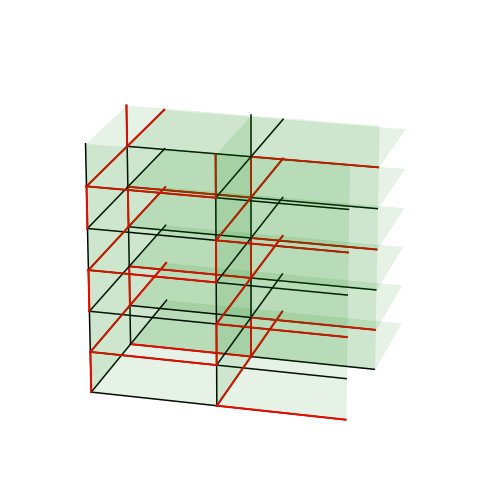

In [4]:
new_state = int('001110100011110001011100001110100011110001011100001110100011110001011100', 2)
latt = LatticeObject(new_state, [2,2,6])
fig, ax = latt.draw()
fig.set_size_inches(6,6)

This can in fact be automatized, so that we can construct the full list.

In [6]:
states_222 = [3816540, 3872106, 5421780, 5678001, 7542990, 7743645,
                9033570, 9234225, 11099214, 11355435, 12905109, 12960675]

states_226 = []
for s22 in states_222:
    s = "{:024b}".format(s22)
    states_226.append(int(s*3, 2))
states_226

[1074260571646206819420,
 1089901011134353970538,
 1526095490192680073940,
 1598215294499136381873,
 2123163061129091160270,
 2179642425947400317085,
 2542724056922244896610,
 2599203421740554053425,
 3124151188370508831822,
 3196270992676965139755,
 3632465471735291243157,
 3648105911223438394275]

Setting up lattice 1074260571646206819420
# of flippable plaquettes: 48
Setting up lattice 1089901011134353970538
# of flippable plaquettes: 48
Setting up lattice 1526095490192680073940
# of flippable plaquettes: 48
Setting up lattice 1598215294499136381873
# of flippable plaquettes: 48
Setting up lattice 2123163061129091160270
# of flippable plaquettes: 48
Setting up lattice 2179642425947400317085
# of flippable plaquettes: 48
Setting up lattice 2542724056922244896610
# of flippable plaquettes: 48
Setting up lattice 2599203421740554053425
# of flippable plaquettes: 48
Setting up lattice 3124151188370508831822
# of flippable plaquettes: 48
Setting up lattice 3196270992676965139755
# of flippable plaquettes: 48
Setting up lattice 3632465471735291243157
# of flippable plaquettes: 48
Setting up lattice 3648105911223438394275
# of flippable plaquettes: 48


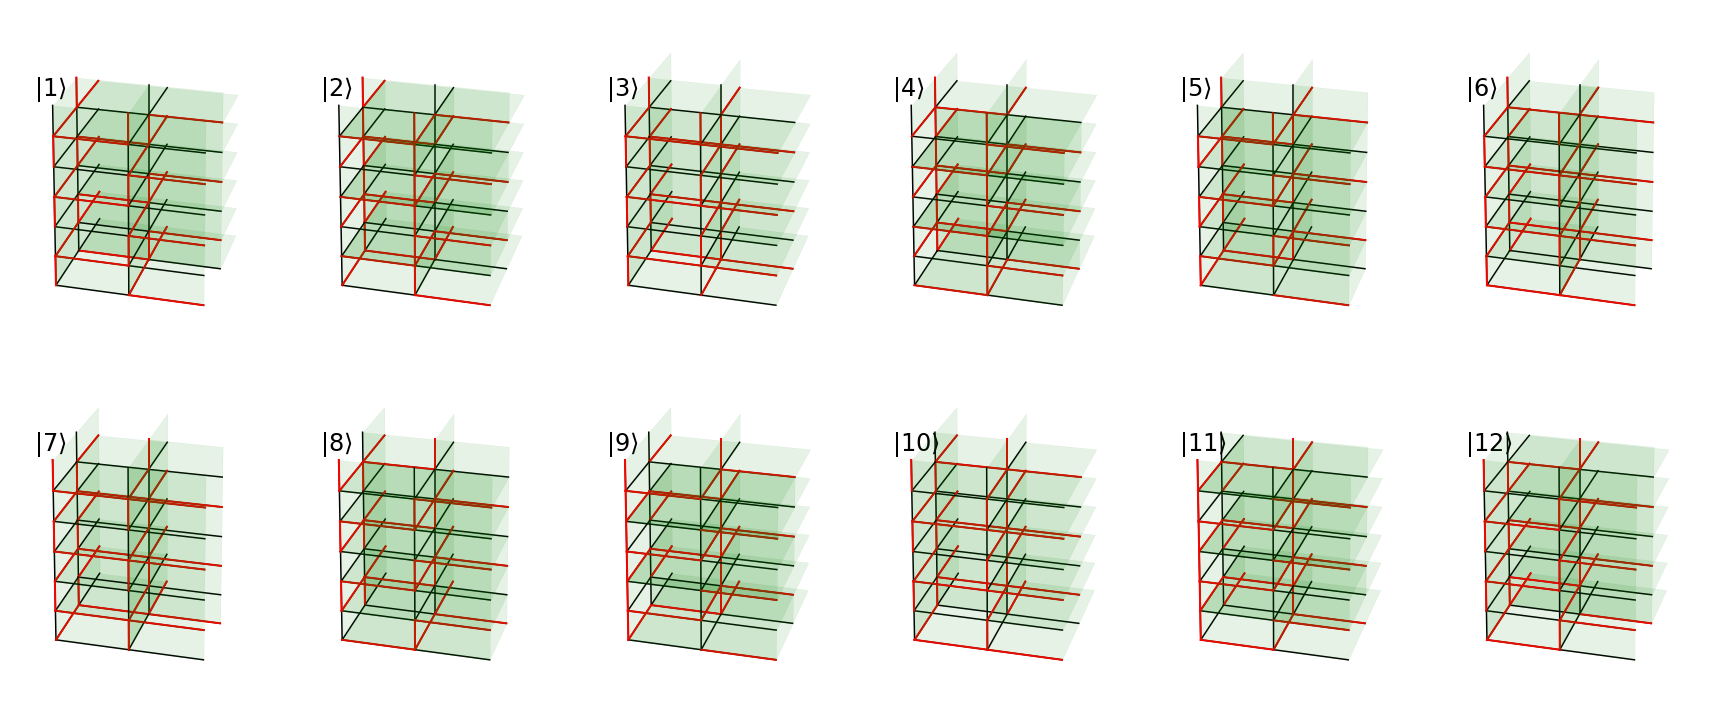

In [7]:
import matplotlib.pyplot as plt
import sys

sys.path.append('../python_symmetry/')
from lattice_object import LatticeObject

def draw_collection(states, filename=None, figsize=(24,10)):
    n_cols = 6
    n_rows = len(states)//n_cols + (1 if len(states)%n_cols else 0)
    fig, axes = plt.subplots(n_rows, n_cols, subplot_kw={'projection': '3d'})
    fig.set_size_inches(*figsize)
    axes = axes.flatten()

    for i, c in enumerate(states):
        latt = LatticeObject(c, [2,2,6])
        latt.draw(axis=axes[i], label='$|{:d}\\rangle$'.format(i+1))

    fig.tight_layout()
    if filename is not None:
        fig.savefig(filename)
        
draw_collection(sorted(states_226))